In [50]:
# %pip install nbimporter
# %pip install nbformat
# %pip install jupyter

In [2]:
# pip show matplotlib
# %pip install --upgrade matplotlib
%pip uninstall matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [11]:
# %pip uninstall matplotlib -y
# %pip uninstall kiwisolver -y
# %pip uninstall cycler -y
# %pip uninstall numpy -y
# %pip uninstall pillow -y

# %pip install --upgrade pip
# %pip install matplotlib
# %pip install plotly
# %pip install ta_lib-0.6.3-cp311-cp311-win_amd64.whl

In [4]:
import sys
import os
import pandas as pd
import numpy as np
import nbimporter
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [7]:
os.chdir("..")  # Go up a directory
#print(os.getcwd())

In [12]:
# notebook/Quantitative analysis.ipynb

sys.path.append(os.path.abspath("../scripts"))
from quantitative import load_data 

# File paths relative to notebook
file_paths = ["Data/AAPL.csv", "Data/AMZN.csv","Data/GOOG.csv",
    "Data/META.csv", "Data/MSFT.csv","Data/NVDA.csv","Data/TSLA.csv"
]

# Load combined DataFrame with Date as index and ticker names as columns
adj_df = load_data(file_paths)

# Display the structure
print(adj_df.head())


                AAPL  AMZN  GOOG  META  MSFT  NVDA  TSLA
Date                                                    
1980-12-12  0.098943   NaN   NaN   NaN   NaN   NaN   NaN
1980-12-15  0.093781   NaN   NaN   NaN   NaN   NaN   NaN
1980-12-16  0.086898   NaN   NaN   NaN   NaN   NaN   NaN
1980-12-17  0.089049   NaN   NaN   NaN   NaN   NaN   NaN
1980-12-18  0.091630   NaN   NaN   NaN   NaN   NaN   NaN


In [13]:
adj_df.tail()

AAPL        AMZN        GOOG        META        MSFT  \
Date                                                                     
2024-07-24  218.287323  180.830002  174.369995  461.269989  428.128326   
2024-07-25  217.238556  179.850006  169.160004  453.410004  417.647217   
2024-07-26  217.708008  182.500000  168.679993  465.700012  424.504852   
2024-07-29  217.987686  183.199997  171.130005  465.709991  425.962250   
2024-07-30  218.547043  181.710007  171.860001  463.190002  422.159119   

                  NVDA        TSLA  
Date                                
2024-07-24  114.250000  215.990005  
2024-07-25  112.279999  220.250000  
2024-07-26  113.059998  219.800003  
2024-07-29  111.589996  232.100006  
2024-07-30  103.730003  222.619995

In [14]:
#  Description of Columns for each ticker
adj_df.describe().T

count        mean         std        min        25%         50%  \
AAPL  10998.0   21.494496   45.561916   0.037857   0.241840    0.432079   
AMZN   6846.0   37.351096   53.729913   0.069792   2.076750    8.591500   
GOOG   5020.0   45.224493   43.332534   2.488082  13.017277   26.975230   
META   2926.0  179.305921  108.755055  22.853037  97.182795  166.512825   
MSFT   9672.0   52.719365   90.066461   0.055665   3.511695   19.145540   
NVDA   6421.0    6.181334   16.121352   0.031291   0.253843    0.427637   
TSLA   3545.0   75.487264  102.456615   1.053333  11.565333   17.459333   

             75%         max  
AAPL   17.253029  234.548523  
AMZN   50.426500  200.000000  
GOOG   60.211734  192.660004  
META  231.948360  539.909973  
MSFT   38.339042  466.718781  
NVDA    4.130434  135.580002  
TSLA  161.479996  409.970001

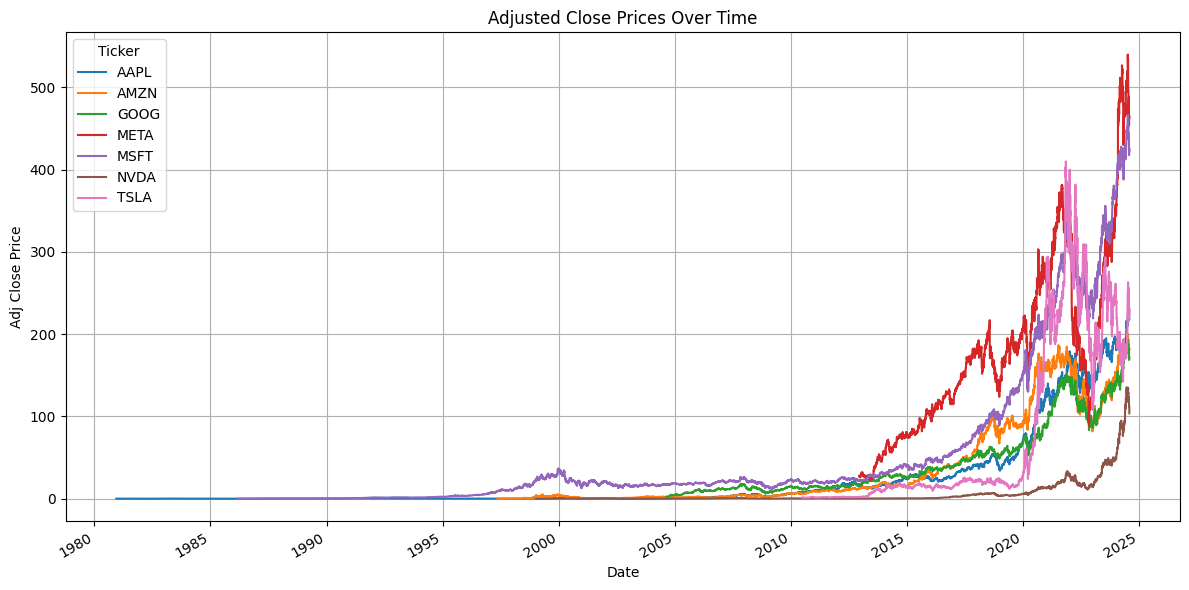

          count        mean         std        min        25%         50%  \
Ticker                                                                      
AAPL    10998.0   21.494496   45.561916   0.037857   0.241840    0.432079   
AMZN     6846.0   37.351096   53.729913   0.069792   2.076750    8.591500   
GOOG     5020.0   45.224493   43.332534   2.488082  13.017277   26.975230   
META     2926.0  179.305921  108.755055  22.853037  97.182795  166.512825   
MSFT     9672.0   52.719365   90.066461   0.055665   3.511695   19.145540   
NVDA     6421.0    6.181334   16.121352   0.031291   0.253843    0.427637   
TSLA     3545.0   75.487264  102.456615   1.053333  11.565333   17.459333   

               75%         max  
Ticker                          
AAPL     17.253029  234.548523  
AMZN     50.426500  200.000000  
GOOG     60.211734  192.660004  
META    231.948360  539.909973  
MSFT     38.339042  466.718781  
NVDA      4.130434  135.580002  
TSLA    161.479996  409.970001  


In [15]:
# Load and visualize
from quantitative import visualize_data 

selected_df = visualize_data(file_paths)

# Pass returned data to another function
def summary_stats(df):
    print(df.groupby('Ticker')['Adj Close'].describe())

summary_stats(selected_df)

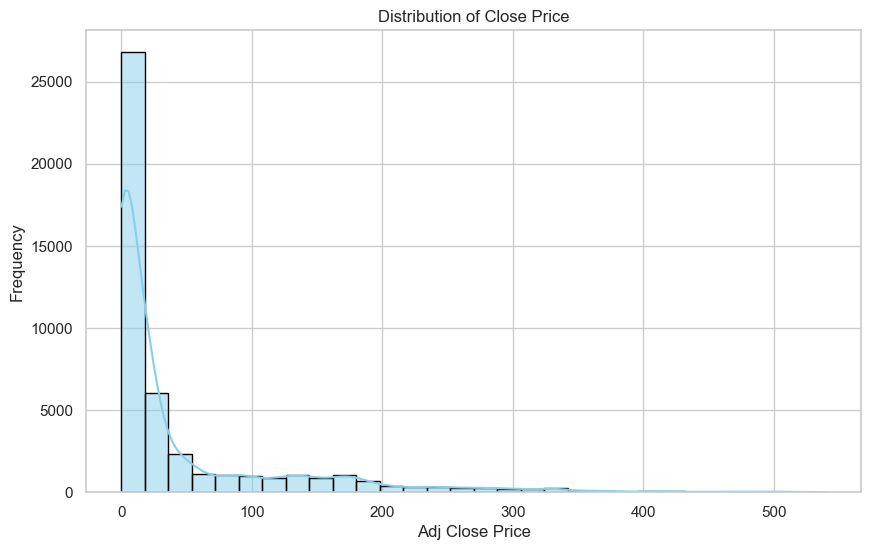

In [16]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plotting the distribution of "Close" price using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(selected_df['Adj Close'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Close Price')
plt.xlabel('Adj Close Price')
plt.ylabel('Frequency')
plt.show()

Descriptive analysis of each stock

In [17]:
descriptive = selected_df.groupby('Ticker')['Adj Close'].describe().transpose()
descriptive

Ticker          AAPL         AMZN         GOOG         META         MSFT  \
count   10998.000000  6846.000000  5020.000000  2926.000000  9672.000000   
mean       21.494496    37.351096    45.224493   179.305921    52.719365   
std        45.561916    53.729913    43.332534   108.755055    90.066461   
min         0.037857     0.069792     2.488082    22.853037     0.055665   
25%         0.241840     2.076750    13.017277    97.182795     3.511695   
50%         0.432079     8.591500    26.975230   166.512825    19.145540   
75%        17.253029    50.426500    60.211734   231.948360    38.339042   
max       234.548523   200.000000   192.660004   539.909973   466.718781   

Ticker         NVDA         TSLA  
count   6421.000000  3545.000000  
mean       6.181334    75.487264  
std       16.121352   102.456615  
min        0.031291     1.053333  
25%        0.253843    11.565333  
50%        0.427637    17.459333  
75%        4.130434   161.479996  
max      135.580002   409.970001

Time Series Analysis

In [18]:
# Time Series Analysis
selected_df['Date'] = pd.to_datetime(selected_df['Date'])
pivot_data = selected_df.pivot(index='Date', columns='Ticker', values='Adj Close')

# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Time Series of Adj Closing Prices',
    xaxis_title='Date',
    yaxis_title='Adj Closing Price',
    legend_title='Stock',
    showlegend=True
)

# Show the plot
fig.show()

Volatility Analysis

In [19]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()

Technical Analysis

Moving Average Analysis

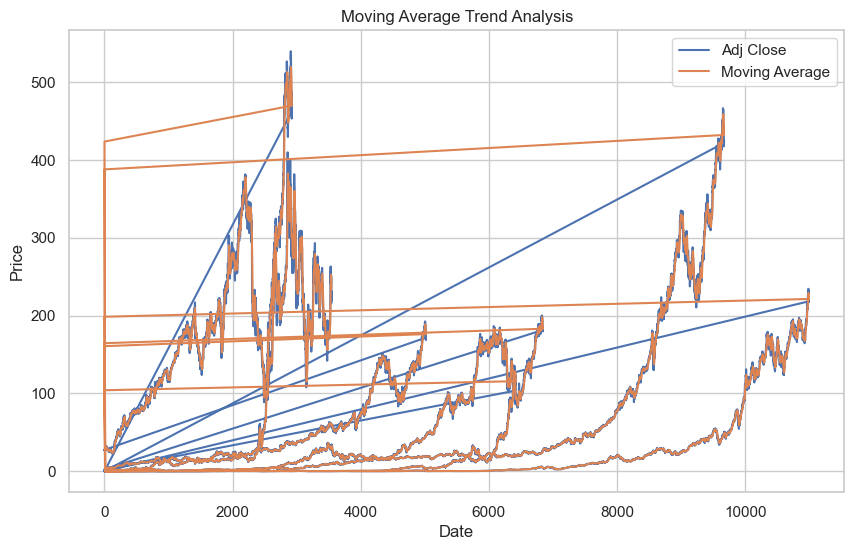

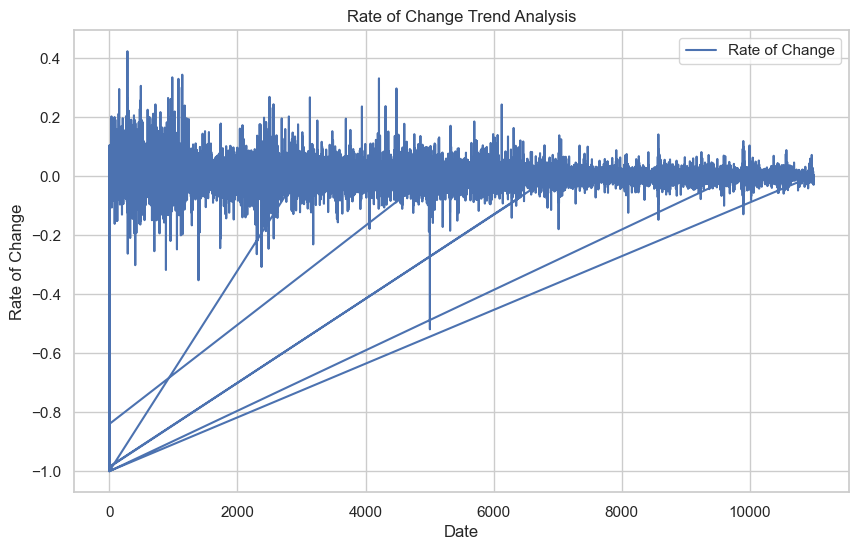

In [20]:
#1) Calculate the moving average
selected_df['moving_average'] = selected_df['Adj Close'].rolling(window=10).mean()

#2) Plot the closing price and moving average
plt.figure(figsize=(10, 6))
plt.plot(selected_df['Adj Close'], label='Adj Close')
plt.plot(selected_df['moving_average'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Trend Analysis')
plt.legend()
plt.show()

#3) Calculate the rate of change
selected_df['rate_of_change'] = (selected_df['Adj Close'] - selected_df['Adj Close'].shift(1)) / selected_df['Adj Close'].shift(1)

# 4) Plot the rate of change

plt.figure(figsize=(10, 6))
plt.plot(selected_df['rate_of_change'], label='Rate of Change')
plt.xlabel('Date')
plt.ylabel('Rate of Change')
plt.title('Rate of Change Trend Analysis')
plt.legend()
plt.show()

Correlation Analysis

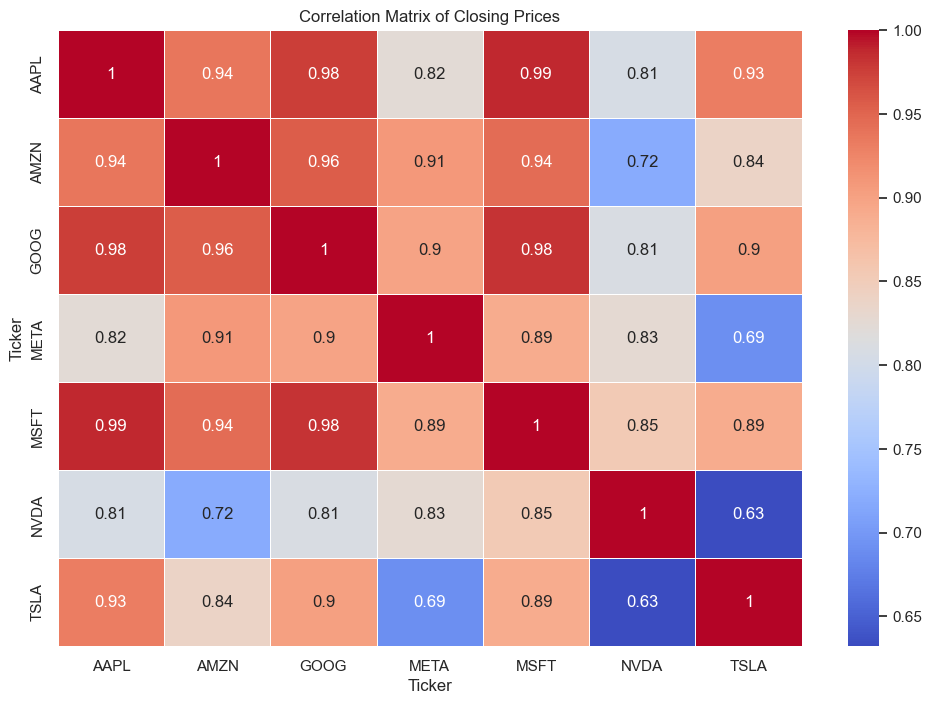

In [21]:
# Check if the 'Date' column is present, and select the relevant columns
if 'Date' in selected_df.columns:
    subset_df = selected_df[['Date', 'Ticker', 'Adj Close']]
else:
    subset_df = selected_df[['Ticker', 'Close']]

# Pivot the DataFrame to have Ticker as columns and Date as index
pivot_data = subset_df.pivot(index='Date', columns='Ticker', values='Adj Close')

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

Comparative Analysis

In [22]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

Visualizing Volatilty

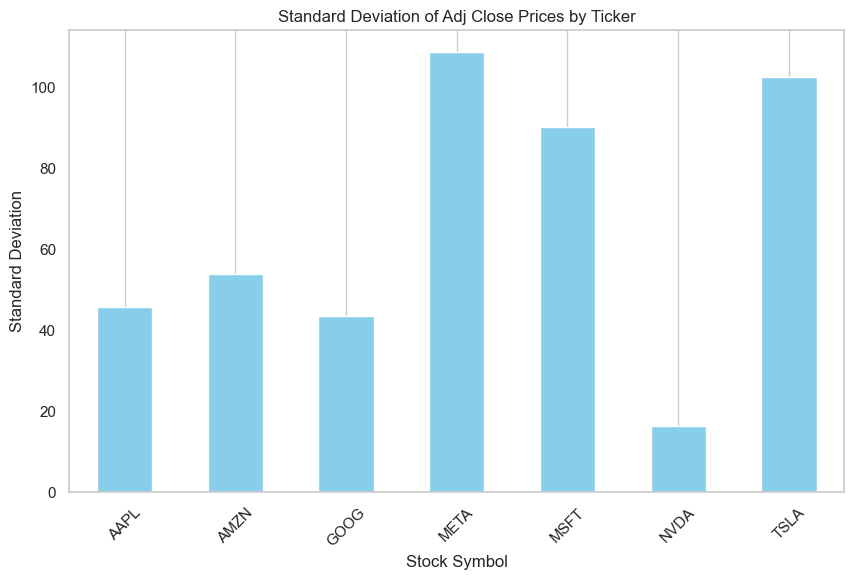

In [23]:
# Extract the 'std' row from the descriptive statistics DataFrame
std_values = descriptive.loc['std']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
std_values.plot(kind='bar', color='skyblue')
plt.title('Standard Deviation of Adj Close Prices by Ticker')
plt.xlabel('Stock Symbol')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Analysis Indicators with TA-Lib

In [28]:
# Load  apply TA-Lib function)
from quantitative import apply_ta

df = selected_df

if df is not None:
    df_with_indicators = apply_ta(df)
    print(df_with_indicators[['Date', 'Adj Close', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail(100))
else:
    print("Failed to load data.")

           Date   Adj Close      SMA_20     RSI_14       MACD  MACD_Signal  \
3445 2024-03-07  178.649994  192.603000  35.607311  -5.124990    -4.074178   
3446 2024-03-08  175.339996  191.892000  33.642587  -5.870812    -4.433505   
3447 2024-03-11  177.770004  191.102000  36.416369  -6.194395    -4.785683   
3448 2024-03-12  177.539993  190.572499  36.261858  -6.395672    -5.107681   
3449 2024-03-13  169.479996  189.845499  31.257115  -7.123444    -5.510833   
...         ...         ...         ...        ...        ...          ...   
3540 2024-07-24  215.990005  237.924999  44.886918  11.789291    15.873789   
3541 2024-07-25  220.250000  239.118999  46.951389   9.353206    14.569672   
3542 2024-07-26  219.800003  240.238000  46.752165   7.302106    13.116159   
3543 2024-07-29  232.100006  241.949000  52.664511   6.593101    11.811547   
3544 2024-07-30  222.619995  242.587000  48.220474   5.206237    10.490485   

      MACD_Hist  
3445  -1.050812  
3446  -1.437307  
3447  -1.